# Домашнє завдання Тема 1



Сьогодні ви виконаєте завдання зі спектральної кластеризації на наборі даних Iris. Ви будете завантажувати дані, виконувати їхній аналіз, проводити спектральну кластеризацію та оцінювати результати за допомогою Confusion Matrix.



Це допоможе вам закріпити такі навички:

Робота з бібліотекою sklearn для завантаження та обробки даних
Використання seaborn для візуалізації розподілу даних за класами
Застосування методів стандартизації даних для підготовки їх до кластеризації
Розуміння та експериментування з параметрами спектральної кластеризації
Оцінка результатів за допомогою Confusion Matrix та візуалізації кластеризації


Завдання (крок за кроком)

1. Завантажити та створити DataFrame: Використовуйте бібліотеку  pandas для створення та роботи з DataFrame. Дані можна завантажити за допомогою load_iris() з бібліотеки sklearn.

2. Отримати базові статистичні характеристики: Використовуйте функції describe() з бібліотеки pandas для отримання статистичних характеристик.

3. Візуалізувати розподілення спостережень за класами: Використовуйте бібліотеку seaborn для побудови графіків.

4. Виконати стандартизацію даних: Використовуйте бібліотеку sklearn.preprocessing для стандартизації даних.

5. Виконати спектральну кластеризація: Використовуйте бібліотеку sklearn.cluster для виконання спектральної кластеризації.

6. Порівняти спрогнозовані кластери та дійсні класи: Використовуйте функцію confusion_matrix() з бібліотеки sklearn.metrics для отримання результатів.

7. Візуалізувати результати кластеризації: Використовуйте бібліотеку seaborn або інші засоби візуалізації для відображення результатів.

8. Висновок: Використовуйте середовище Jupyter Notebook або іншу платформу для написання текстових висновків та аналізу результатів.



Підказки

Переконайтеся, що у вас встановлені необхідні бібліотеки за допомогою pip install pandas seaborn scikit-learn.



## 1. Завантаження та створення DataFrame

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Завантаження даних iris
iris = load_iris()
    # print(iris.DESCR)


# Створення DataFrame з атрибутів та цільових значень
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# # Додавання стовпця з цільовими значеннями
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## 2. Базові статистичні характеристики

In [2]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [3]:
# Виведення ознак
print("Ознаки (features):", iris.feature_names)

# Виведення цільових міток
print("Мітки (target):", iris.target_names)

print("Розподіл:", df.target.value_counts())

# Виведення розмірності даних
print("Розмірність даних:", iris.data.shape)

Ознаки (features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Мітки (target): ['setosa' 'versicolor' 'virginica']
Розподіл: target
0    50
1    50
2    50
Name: count, dtype: int64
Розмірність даних: (150, 4)


## 3. Візуалізація розподілення спостережень за класами.

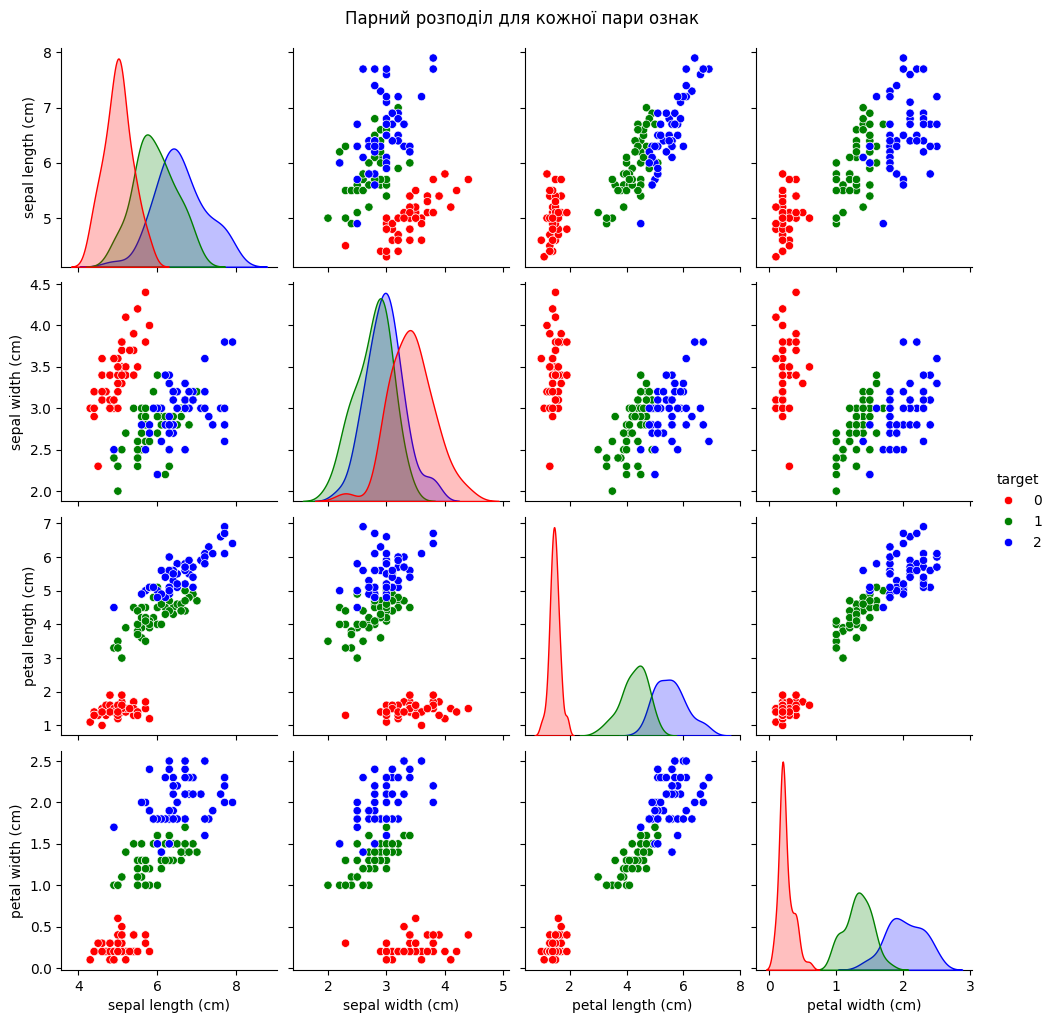

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {0: 'red', 1: 'green', 2: 'blue'}  # Визначення палітри кольорів
sns.pairplot(df, hue='target', diag_kind='kde', palette=palette)
    # sns.pairplot(df, hue='target', palette= "tab10", diag_kind='hist')
plt.suptitle('Парний розподіл для кожної пари ознак', y=1.02)
plt.show()

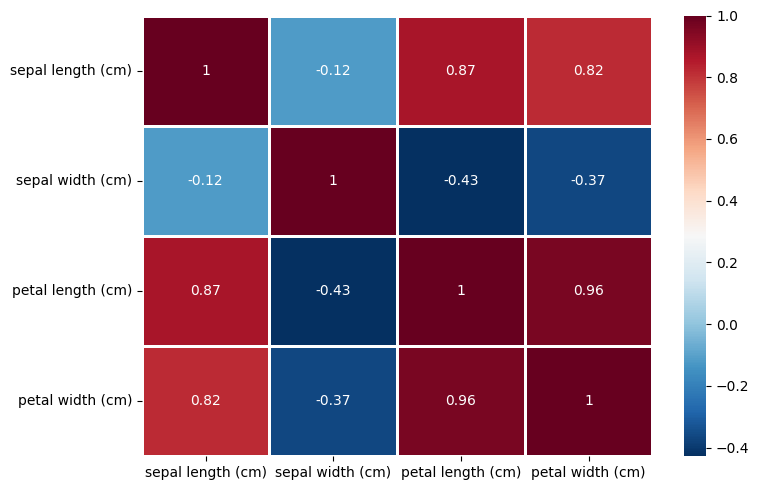

In [5]:
# Включення теплової карти кореляції допомагає зрозуміти взаємозв'язки між змінними, що може бути корисним для інтерпретації результатів кластеризації.

pearsoncorr = df.drop('target', axis=1).corr()

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)
fig.tight_layout()

Висока кореляція 'petal length (cm)', 'petal width (cm)' = 0.96 показує що крупні пелюски зазвичай крупні і в ширину і в довжину, а значить одну з ознак можна видилити.

##  4. Стандартизація даних

In [6]:
from sklearn.preprocessing import StandardScaler

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Перетворення стандартизованих даних у DataFrame для зручності
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled = df_scaled.drop(columns=['petal width (cm)'])  # Видалення неважливих стовпців
df_scaled['target'] = df['target']

# Перегляд перших кількох рядків стандартизованого DataFrame
print(df_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  target
0          -0.900681          1.019004          -1.340227       0
1          -1.143017         -0.131979          -1.340227       0
2          -1.385353          0.328414          -1.397064       0
3          -1.506521          0.098217          -1.283389       0
4          -1.021849          1.249201          -1.340227       0


In [7]:
# Базові статистичні характеристики стандартизованих даних
print(df_scaled.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)      target
count       1.500000e+02      1.500000e+02       1.500000e+02  150.000000
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15    1.000000
std         1.003350e+00      1.003350e+00       1.003350e+00    0.819232
min        -1.870024e+00     -2.433947e+00      -1.567576e+00    0.000000
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00    0.000000
50%        -5.250608e-02     -1.319795e-01       3.364776e-01    1.000000
75%         6.745011e-01      5.586108e-01       7.627583e-01    2.000000
max         2.492019e+00      3.090775e+00       1.785832e+00    2.000000


## 5. Спектральна кластеризація

In [8]:
from sklearn.cluster import SpectralClustering

# Виконання спектральної кластеризації
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
clusters = spectral_clustering.fit_predict(X_scaled)

# Додавання спрогнозованих кластерів до DataFrame
df_scaled['cluster'] = clusters

# Перегляд перших кількох рядків DataFrame з кластерами
print(df_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  target  cluster
0          -0.900681          1.019004          -1.340227       0        0
1          -1.143017         -0.131979          -1.340227       0        0
2          -1.385353          0.328414          -1.397064       0        0
3          -1.506521          0.098217          -1.283389       0        0
4          -1.021849          1.249201          -1.340227       0        0


## 6. Порівняння спрогнозовани кластерів та дійсних класів

In [9]:
from sklearn.metrics import confusion_matrix

# Порівняння спрогнозованих кластерів з дійсними класами
conf_matrix = confusion_matrix(df_scaled['target'], df_scaled['cluster'])
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[49  1  0]
 [ 0 47  3]
 [ 0 18 32]]


На основі отриманої Confusion Matrix ми можемо зробити такі висновки:

- Клас 0 (Setosa): Модель успішно класифікувала 49 з 50 спостережень як Setosa, що свідчить про високу точність для цього класу. Одне спостереження було неправильно класифіковане як Versicolor, а жодне спостереження не було помилково віднесено до Virginica.

- Клас 1 (Versicolor): Модель правильно класифікувала 47 спостережень як Versicolor, але 3 спостереження були неправильно класифіковані як Virginica. Немає помилок класифікації в інший бік (від Versicolor до Setosa).

- Клас 2 (Virginica): Модель правильно класифікувала 32 спостереження як Virginica, але 18 спостережень були помилково віднесені до Versicolor. Жодне спостереження не було помилково класифіковане як Setosa.

## 7. Візуалізація результатів кластеризації

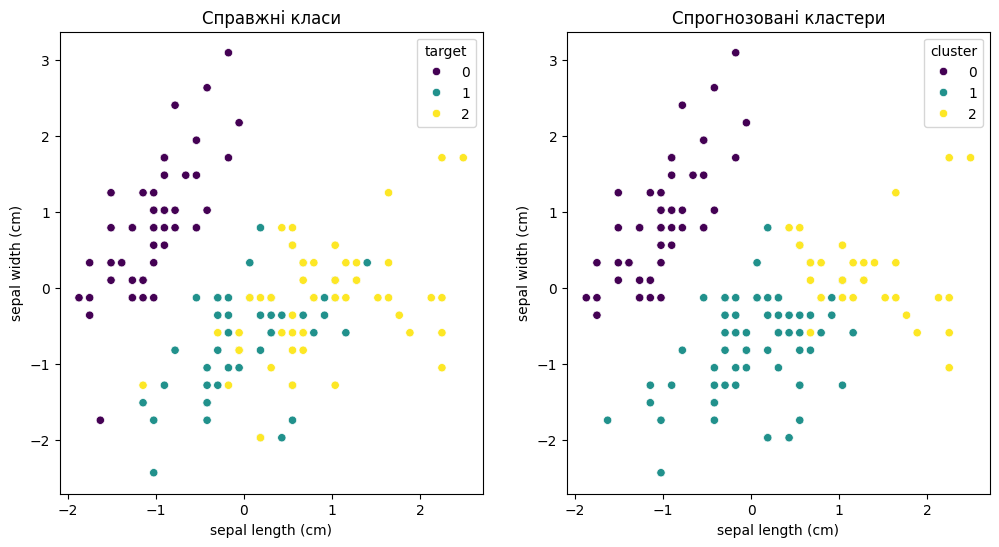

In [10]:
plt.figure(figsize=(12, 6))

# Розподіл спостережень за справжніми класами
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue='target', data=df_scaled, palette='viridis')
plt.title('Справжні класи')

# Розподіл спостережень за спрогнозованими кластерами
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue='cluster', data=df_scaled, palette='viridis')
plt.title('Спрогнозовані кластери')

plt.show()

#8. Висновок

У цьому завданні ми використали набір даних Iris для демонстрації процесу спектральної кластеризації. Після завантаження та попередньої обробки даних ми виконали кілька етапів:

1. Візуалізація розподілу спостережень за класами:
Розподіл спостережень було візуалізовано для кожного класу, що дозволило зрозуміти структуру даних.

2. Стандартизація даних:
Дані були стандартизовані для покращення якості кластеризації.

3. Спектральна кластеризація:
Застосували спектральну кластеризацію для групування даних.

### Оцінка результатів:
Результати кластеризації були порівняні з дійсними класами за допомогою матриці невідповідностей (Confusion Matrix). Візуалізували розподіл спостережень за справжніми класами та спрогнозованими кластерами.

Результати:

- Класифікація класу Setosa:
Модель демонструє високу точність у класифікації класу Setosa, з незначною кількістю помилок.

- Класифікація класу Versicolor:
Класифікація класу Versicolor в основному точна, але є деякі помилки при класифікації як Virginica.

- Класифікація класу Virginica:
Модель має певні труднощі при класифікації класу Virginica, оскільки частина спостережень була неправильно класифікована як Versicolor.

### Аналіз та рекомендації
- **Точність класифікації**:
Модель добре справляється з класифікацією класів Setosa і Versicolor, але має проблеми з класифікацією Virginica. Це може свідчити про перекриття між класами, що потребує додаткового аналізу.

- **Можливі вдосконалення**:
Може бути корисно вдосконалити модель або спробувати інші методи кластеризації для покращення класифікації класу Virginica.

- **Подальший аналіз**:
Рекомендується провести додатковий аналіз для розуміння причин перекриття між класами, можливо, шляхом застосування інших методів машинного навчання або збирання додаткових даних.

Цей процес допоміг нам краще зрозуміти, як можна застосовувати методи кластеризації для аналізу та групування даних, а також як оцінювати результати кластеризації.